<a href="https://colab.research.google.com/github/ahekmati/ahekmati.github.io/blob/master/Alpaca_Corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
pip install alpaca-trade-api

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import alpaca_trade_api as tradeapi

# Makes output higher resolution.
%config InlineBackend.figure_format = 'retina'

In [0]:
# Paper trade log-in
api = tradeapi.REST('PK007TQ2LR6TWQFJKQ0Q',
                    '0fsYkHEE4x6MIABnucxC0iYFWcxPyupET6Dj6489', 
                    'https://paper-api.alpaca.markets')

In [0]:
def get_bars(symbol):
    
    data = api.get_barset(symbol, 'day', limit=1000)
    data = data.df[symbol]['close']

    return data

In [0]:
def correlation(equity_list):  
    
    df = pd.DataFrame()
    equity_columns = []
    
    # Get symbol history
    for symbol in equity_list:   
        try:
            symbol_df = get_bars(symbol)
            df = pd.concat([df, symbol_df], axis=1)
            equity_columns.append(symbol)
        except:
            print('Exception with {}'.format(symbol))
            
    df.columns = equity_columns
    
    # Get correlation and sort by sum
    sum_corr = df.corr(method = 'pearson').sum().sort_values(ascending=True).index.values
    
    return df[sum_corr].corr()

In [0]:
# Make orders

api.submit_order('SNAP', 100, 'buy', 'market', 'day')
api.submit_order('SLV', 100, 'buy', 'market', 'day')
api.submit_order('JNJ', 100, 'buy', 'market', 'day')
api.submit_order('AAPL', 10, 'buy', 'market', 'day')
api.submit_order('GLD', 100, 'buy', 'market', 'day')
api.submit_order('GOOG', 1, 'buy', 'market', 'day')
api.submit_order('CAT', 100, 'buy', 'market', 'day')
api.submit_order('EWZ', 10, 'buy', 'market', 'day')

Order({   'asset_class': 'us_equity',
    'asset_id': '43fe249c-7552-4d8d-b12f-a86cf6b6bd3a',
    'canceled_at': None,
    'client_order_id': '44bec012-b574-4631-aad4-ad4662743778',
    'created_at': '2020-04-22T17:48:16.761752Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'id': '21b4d3e8-24ec-410c-8312-10e00dfb3ad3',
    'legs': None,
    'limit_price': None,
    'order_class': '',
    'order_type': 'market',
    'qty': '10',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'buy',
    'status': 'accepted',
    'stop_price': None,
    'submitted_at': '2020-04-22T17:48:16.73935Z',
    'symbol': 'EWZ',
    'time_in_force': 'day',
    'type': 'market',
    'updated_at': '2020-04-22T17:48:16.761752Z'})

In [0]:
pos_list = [x.symbol for x in api.list_positions()]

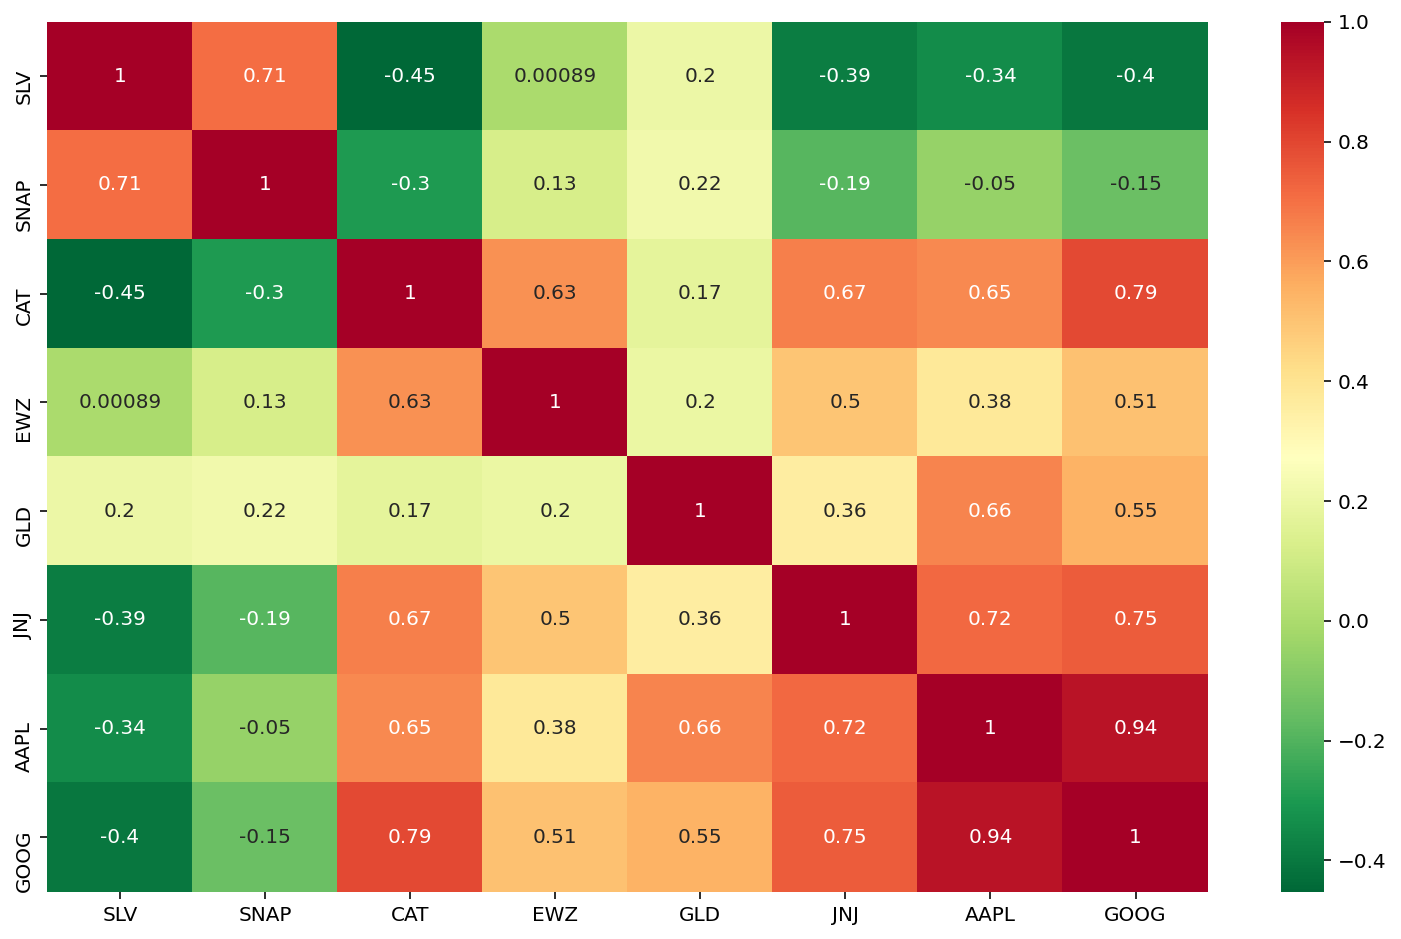

In [0]:
# Call the df with the list from summed correlation, sorted ascending.
plt.figure(figsize=(13,8))
sns.heatmap(correlation(pos_list), 
            annot=True, 
            cmap="RdYlGn_r");

In [0]:
# Best:
#     cmap="RdYlGn_r"
#     cmap='summer_r'
#     cmap="Blues"
#     cmap="Greens"

# Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, 
#     CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, 
#     PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, 
#     PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, 
#     RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, 
#     Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, 
#     autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, 
#     cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, 
#     gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, 
#     gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, 
#     gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, 
#     magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, 
#     plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, 
#     summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, 
#     twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [0]:
# Bonus code: compare sorting by "absolute" correlation coef sums.

def abs_correlation(equity_list):  
    
    df = pd.DataFrame()
    equity_columns = []
    
    # Get symbol history
    for symbol in equity_list:   
        try:
            symbol_df = get_bars(symbol)
            df = pd.concat([df, symbol_df], axis=1)
            equity_columns.append(symbol)
        except:
            print('Exception with {}'.format(symbol))
            
    df.columns = equity_columns
    
    # Get correlation and sort by sum
    sum_corr = abs(df.corr()).sum().sort_values(ascending=True).index.values
    
    return df[sum_corr].corr()

In [0]:
pos_list = ['SNAP', 'SLV', 'JNJ', 'GOOG', 
            'GLD', 'EWZ', 'CAT', 'AAPL', 
            'USO', 'AAL', 'QQQ', 'AMZN', 
            'MMM', 'JNK', 'TLT', 'GS']

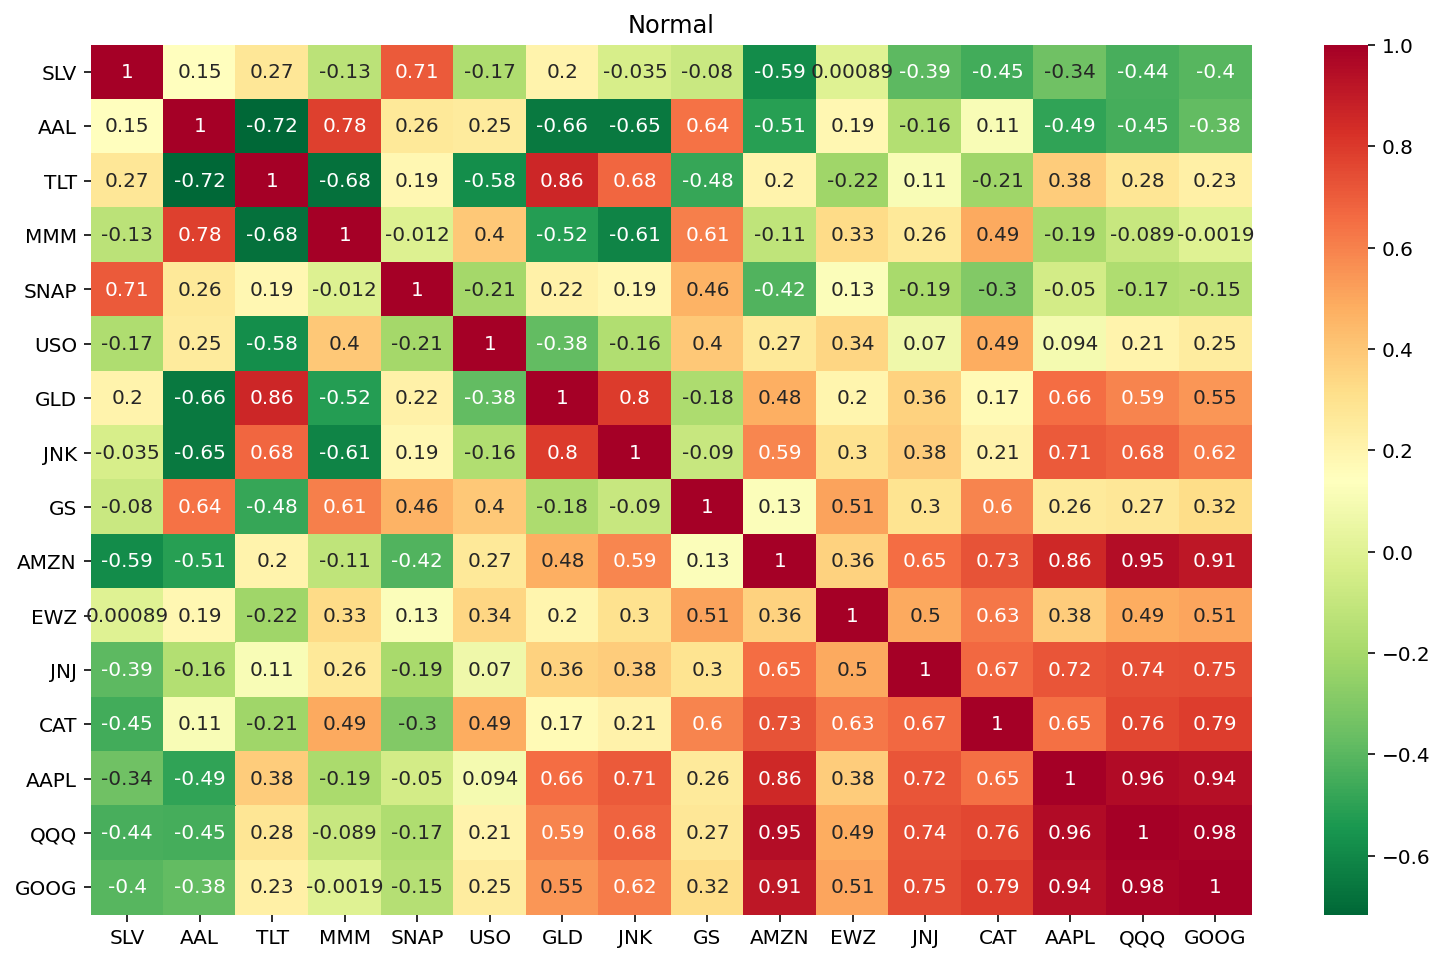

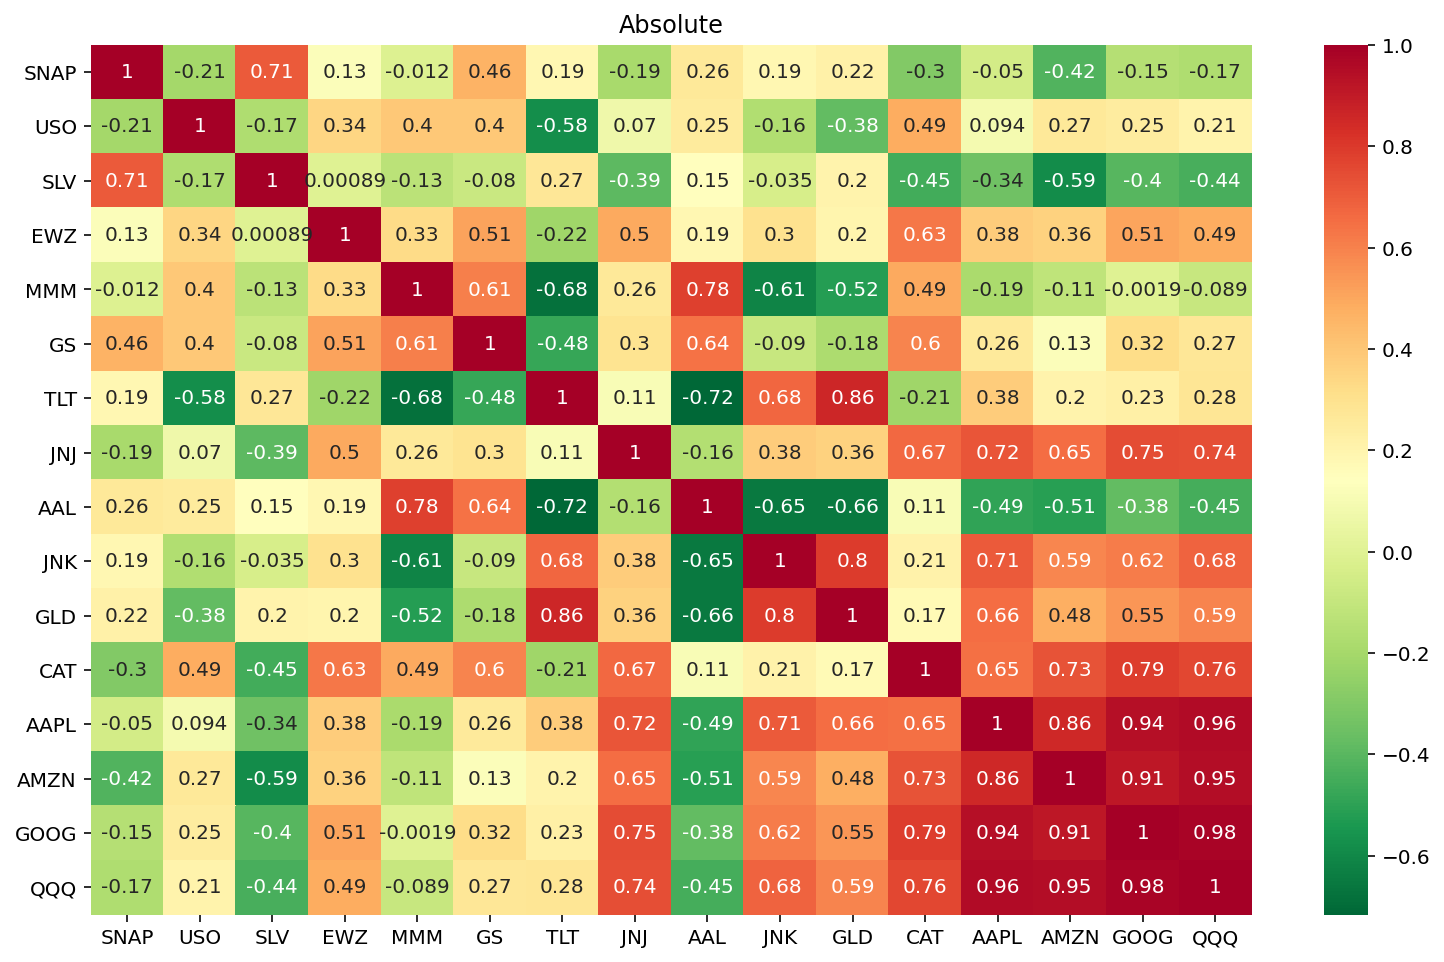

In [0]:
# Call the df with the list from summed correlation, sorted ascending.
plt.figure(figsize=(13,8))
plt.title('Normal')
sns.heatmap(correlation(pos_list), annot=True, cmap="RdYlGn_r");

plt.figure(figsize=(13,8))
plt.title('Absolute')
sns.heatmap(abs_correlation(pos_list), annot=True, cmap="RdYlGn_r");

In [0]:
# Bonus code: for each symbol, get the top three least correlated symbols from S&P100

def get_top_three(equity_list):
    
    # Add equity list to Universe
    all_sym = Universe.extend([x for x in equity_list if x not in Universe])
    
    # Get all correlations
    correlation_df = correlation(Universe)
    
    least_corr_sym = []
    least_corr_coef = []
    
    for symbol in equity_list:

        top_three = abs(correlation_df[symbol]).sort_values(ascending=True).head(3)

        for item in zip(top_three.index, top_three):

            index_tuple = (symbol, item[0])
            least_corr_sym.append(index_tuple)
            least_corr_coef.append(item[1])

    top_three_df = pd.DataFrame(
        least_corr_coef,
        index = pd.MultiIndex.from_tuples(least_corr_sym, names=('Symbol', 'Least correlation')),
        columns=['CC']
    )
    
    return top_three_df

In [0]:
# S&P 100
Universe = ['AAL', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'ALGN', 'ALXN', 'AMAT', 'AMGN', 'AMZN', 
            'ASML', 'ATVI', 'AVGO', 'BIDU', 'BIIB', 'BKNG', 'BMRN', 'CA', 'CDNS', 'CELG', 'CERN', 
            'CHKP', 'CHTR', 'CMCSA', 'COST', 'CSCO', 'CSX', 'CTAS', 'CTRP', 'CTSH', 'CTXS', 'DISH', 
            'DLTR', 'EA', 'EBAY', 'ESRX', 'EXPE', 'FAST', 'FB', 'FISV', 'FOX', 'FOXA', 'GILD', 
            'GOOG', 'GOOGL', 'HAS', 'HOLX', 'HSIC', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 
            'JBHT', 'JD', 'KHC', 'KLAC', 'LBTYA', 'LBTYK', 'LRCX', 'MAR', 'MCHP', 'MDLZ', 'MELI', 
            'MNST', 'MSFT', 'MU', 'MXIM', 'MYL', 'NFLX', 'NTES', 'NVDA', 'ORLY', 'PAYX', 'PCAR', 
            'PYPL', 'QCOM', 'QRTEA', 'REGN', 'ROST', 'SBUX', 'SHPG', 'SIRI', 'SNPS', 'STX', 'SWKS',
            'SYMC', 'TMUS', 'TSLA', 'TTWO', 'TXN', 'ULTA', 'VOD', 'VRSK', 'VRTX', 'WBA', 'WDAY', 
            'WDC', 'WYNN', 'XLNX', 'XRAY']

In [0]:
top_three = get_top_three(pos_list)
top_three

CC
Symbol Least correlation          
SNAP   ASML               0.001722
       SNPS               0.009255
       ATVI               0.010739
SLV    EWZ                0.000883
       MDLZ               0.003135
       REGN               0.004481
JNJ    WDC                0.011154
       EXPE               0.030607
       BIDU               0.057156
GOOG   MMM                0.001925
       FAST               0.039645
       WDC                0.069068
GLD    XRAY               0.027256
       SYMC               0.029989
       EA                 0.034305
EWZ    SLV                0.000883
       INCY               0.005180
       CA                 0.009276
CAT    BMRN               0.007360
       SYMC               0.009856
       ULTA               0.030195
AAPL   SNAP               0.049711
       BIIB               0.084225
       ULTA               0.093365
USO    WBA                0.003466
       CMCSA              0.004073
       LRCX               0.020154
AAL    CHKP               0.044963
       NVDA               0.051127
       ALGN               0.059811
QQQ    BIIB               0.034234
       MMM                0.088507
       FAST               0.106853
AMZN   FAST               0.005682
       BIIB               0.022703
       BMRN               0.085312
MMM    GOOG               0.001925
       NFLX               0.002067
       CSCO               0.003897
JNK    XRAY               0.017545
       SLV                0.035476
       FOXA               0.057946
TLT    STX                0.004148
       GILD               0.005580
       CSCO               0.006532
GS     HSIC               0.001899
       WDAY               0.005472
       COST               0.008244